In [1]:
import sqlite3
import pandas as pd
con = sqlite3.connect("../unified_final.db")
cur = con.cursor()

df = pd.read_sql_query("SELECT * FROM prod_desc", con)
df['AB'] = df['AB'].apply(lambda x: int.from_bytes(x, "little"))
df

,level_0,index,id,name,AB,description,OX,source,seq,valid,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.0,b'\x00\x00\x00\x00\x00\x00\x00\x00',ADAM_2177,InverPep_ADAM_2177,1,None,alien,InverPep.fasta,GLFNVFKGLKTAGKHVAGSLLNQLKCKVSGGC,yes,...,0,0,0,0,0,0,0,0,5,0
1,NaN,b'\x981\x00\x00\x00\x00\x00\x00',P85402,UP04_GINBI,0,Unknown protein 4 (Fragment),Ginkgo biloba OX=3311,uniprot_swissprot.fasta,GDAAAQPEK,yes,...,0,0,0,0,0,0,0,0,1,0
2,NaN,b'\x991\x00\x00\x00\x00\x00\x00',P85403,UP05_GINBI,0,Unknown protein 5 (Fragment),Ginkgo biloba OX=3311,uniprot_swissprot.fasta,NNQLNASHK,yes,...,0,0,0,0,0,0,0,0,1,0
3,NaN,b'\x9a1\x00\x00\x00\x00\x00\x00',P85404,UP06_GINBI,0,Unknown protein 6 (Fragment),Ginkgo biloba OX=3311,uniprot_swissprot.fasta,GDVVANPESVELK,yes,...,0,0,0,0,0,0,0,0,1,0
4,NaN,b'\x9b1\x00\x00\x00\x00\x00\x00',P85405,UP07_GINBI,0,Unknown protein 7 (Fragment),Ginkgo biloba OX=3311,uniprot_swissprot.fasta,GSTTAESAALR,yes,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11516,NaN,b'\xee \x00\x00\x00\x00\x00\x00',P00137,CYC3_DESAC,0,Cytochrome c3,Desulfuromonas acetoxidans OX=891 GN=cyd,uniprot_swissprot.fasta,ADVVTYENKKGNVTFDHKAHAEKLGCDACHEGTPAKIAIDKKSAHK...,yes,...,0,0,0,0,0,0,0,0,12,0
11517,NaN,b'\xef \x00\x00\x00\x00\x00\x00',P00195,FER_CLOPA,0,Ferredoxin,Clostridium pasteurianum OX=1501,uniprot_swissprot.fasta,MAYKIADSCVSCGACASECPVNAISQGDSIFVIDADTCIDCGNCAN...,yes,...,1,0,0,0,0,0,0,0,1,0
11518,NaN,b'\xf0 \x00\x00\x00\x00\x00\x00',P00198,FER_GOTA9,0,4Fe-4S ferredoxin FdxA,Gottschalkia acidurici (strain ATCC 7906 / DSM...,uniprot_swissprot.fasta,MAYVINEACISCGACEPECPVNAISSGDDRYVIDADTCIDCGACAG...,yes,...,1,0,0,0,0,0,0,0,1,0
11519,NaN,b'\xf1 \x00\x00\x00\x00\x00\x00',P00211,FER2_DESNO,0,Ferredoxin-2,Desulfomicrobium norvegicum (strain DSM 1741 /...,uniprot_swissprot.fasta,MGYSVIVDSDKCIGCGECVDVCPVEVYELQNGKAVPVNEEECLGCE...,yes,...,1,0,0,0,0,0,0,0,2,0


# Logistic regression

c:\Users\Etienne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1066: RuntimeWarning: overflow encountered in square
  temp **= 2
c:\Users\Etienne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\Etienne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\Etienne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:86: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


Accuracy: 0.69
Confusion Matrix:
[[665 366]
 [351 923]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1031
           1       0.72      0.72      0.72      1274

    accuracy                           0.69      2305
   macro avg       0.69      0.68      0.68      2305
weighted avg       0.69      0.69      0.69      2305



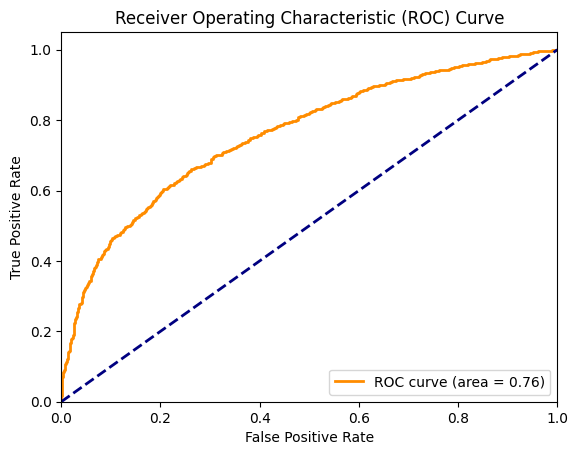

Optimization terminated successfully.
         Current function value: 0.549253
         Iterations 7


LinAlgError: Singular matrix

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assume df is your DataFrame
# df = pd.read_csv('your_file.csv')  # Uncomment and modify this line if you need to load your data

# Step 2: Replace all missing values with 0
df.fillna(0, inplace=True)

# Step 3: Drop all columns with non-numeric contents
df_numeric = df.select_dtypes(include=[np.number]).drop('index', axis=1, errors='ignore')

# Step 4: Replace infinities and NaNs resulting from any prior transformations with finite numbers
df_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
df_numeric.fillna(0, inplace=True)

# Step 5: Ensure the target variable is binary
if df_numeric['AB'].nunique() != 2:
    raise ValueError("The target variable 'AB' should be binary for logistic regression.")

# Step 6: Prepare the data by separating features and target
X = df_numeric.drop(columns=['AB'])  # Features
y = df_numeric['AB']  # Target

# Step 7: Cap extreme values to a reasonable range
# Cap values at 99.9th percentile to prevent overflow issues
cap_value = np.percentile(X, 99.9, axis=0)
X_capped = np.minimum(X, cap_value)

# Step 8: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_capped)

# Step 9: Ensure no inf or NaN values are present after scaling
X_scaled = np.nan_to_num(X_scaled, nan=0.0, posinf=0.0, neginf=0.0)

# Step 10: Remove duplicate columns
_, unique_indices = np.unique(X_scaled, axis=1, return_index=True)
X_unique = X_scaled[:, unique_indices]

# Step 11: Check for multicollinearity and remove highly correlated features
correlation_matrix = pd.DataFrame(X_unique).corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
X_reduced = pd.DataFrame(X_unique).drop(columns=to_drop)

# Step 12: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Step 13: Train the logistic regression model using sklearn with regularization
model_sklearn = LogisticRegression(max_iter=100000, tol=1e-2, penalty='l2')
model_sklearn.fit(X_train, y_train)

# Step 14: Evaluate the model
y_pred = model_sklearn.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Step 15: Generate ROC Curve
# Calculate the predicted probabilities
y_prob = model_sklearn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig("logRegRoc.pdf")
plt.show()

# Step 16: Display Feature Importance with p-values using statsmodels
X_train_with_const = sm.add_constant(X_train)  # Add a constant to the model
logit_model = sm.Logit(y_train, X_train_with_const)
result = logit_model.fit()

# Extracting the p-values and coefficients
p_values = result.pvalues[1:]  # Ignore the intercept
coefficients = result.params[1:]  # Ignore the intercept

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': pd.DataFrame(X_reduced).columns,
    'Coefficient': coefficients,
    'P-Value': p_values
})

# Sort the DataFrame by the absolute value of the coefficients
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

# Print the feature importance with p-values
print('Feature Importance with P-Values:')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(importance_df)


Label: AUC = 0.81
x_data: [0.         0.03352601 0.10115607 0.19768786 0.37052023 0.56531792
 0.77976879 1.        ]
y_data: [0.         0.32306964 0.53055424 0.69351018 0.82567504 0.91615348
 0.97110374 1.        ]
Label: _child1
x_data: [0 1]
y_data: [0 1]


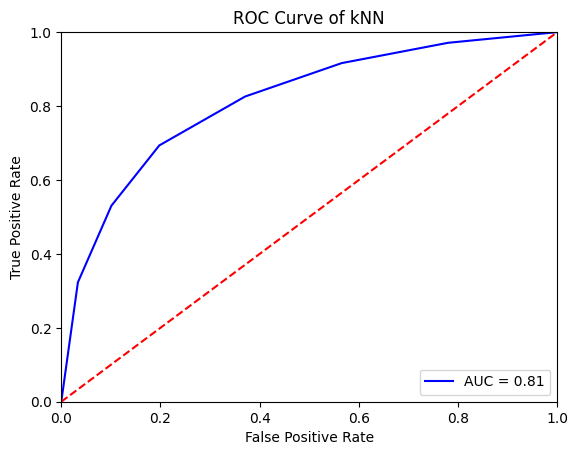

In [15]:
import pickle

with open('roc_curve_plot.pkl', 'rb') as file:
    fig = pickle.load(file)

# Get the axes from the figure
ax = fig.axes[0]

# Extract data from each line in the axes
lines = ax.get_lines()
for line in lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    label = line.get_label()
    print(f"Label: {label}")
    print(f"x_data: {x_data}")
    print(f"y_data: {y_data}")


plt.show()

     False Positive Rate  True Positive Rate
0               0.000000            0.000000
1               0.000000            0.000721
2               0.000000            0.024513
3               0.000852            0.024513
4               0.000852            0.026676
..                   ...                 ...
795             0.988927            0.998558
796             0.988927            0.999279
797             0.995741            0.999279
798             0.995741            1.000000
799             1.000000            1.000000

[800 rows x 2 columns]


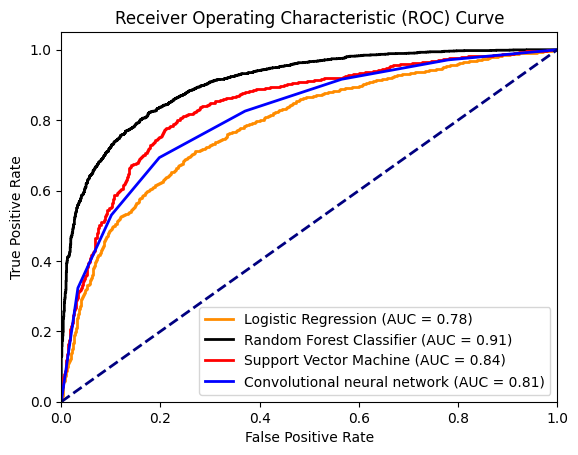

In [37]:
# Plot ROC curve
knn_x = [0,0.03352601, 0.10115607, 0.19768786, 0.37052023, 0.56531792, 0.77976879,1 ]
knn_y =  [0,0.32306964, 0.53055424, 0.69351018, 0.82567504, 0.91615348,0.97110374, 1]
df = pd.read_csv("roc_with.csv")
tpr_rfc = pd.read_csv("tpr_rfc.txt")
fpr_rfc = pd.read_csv("fpr_rfc.txt")
print(df)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic Regression (AUC = 0.78)')
plt.plot(fpr_rfc, tpr_rfc, color='black', lw=2, label='Random Forest Classifier (AUC = 0.91)')
plt.plot(df['False Positive Rate'], df['True Positive Rate'], color='red', lw=2, label='Support Vector Machine (AUC = 0.84)')
plt.plot(knn_x,knn_y, color='blue', lw=2, label='Convolutional neural network (AUC = 0.81)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig("combinedROC.pdf")
plt.show()

# Alternate libaries

In [6]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Initialize H2O cluster
h2o.init()

# Convert pandas DataFrame to H2OFrame
h2o_df = h2o.H2OFrame(df_numeric)

# Split data into training and test sets
train, test = h2o_df.split_frame(ratios=[0.8], seed=42)

# Define the features and target
X = h2o_df.columns
y = 'AB'
X.remove(y)

# Initialize and train the logistic regression model
model = H2OGeneralizedLinearEstimator(family="binomial")
model.train(x=X, y=y, training_frame=train)

# Make predictions
predictions = model.predict(test)

# Evaluate the model
performance = model.model_performance(test)
print(performance)

# Output feature importance and p-values
coefficients_with_p_values = model.coef_with_p_values()

# Print coefficients and p-values
print("Coefficients and p-values:")
for feature, values in coefficients_with_p_values.items():
    coef = values['coefficients']
    p_value = values['p_value']
    print(f"{feature}: Coefficient = {coef}, P-value = {p_value}")


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,6 mins 30 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.3
H2O_cluster_version_age:,14 days and 10 minutes
H2O_cluster_name:,H2O_from_python_Etienne_5cauaw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.649 Gb
H2O_cluster_total_cores:,20
H2O_cluster_allowed_cores:,20
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.18865473536890207
RMSE: 0.4343440288169069
LogLoss: 0.5604158897393919
AUC: 0.7849766695314677
AUCPR: 0.8135992193944886
Gini: 0.5699533390629354
Null degrees of freedom: 2265
Residual degrees of freedom: 2189
Null deviance: 3124.3694101439933
Residual deviance: 2539.8048122989244
AIC: 2693.8048122989244

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4048992154926109
       0    1     Error    Rate
-----  ---  ----  -------  --------------
0      534  501   0.4841   (501.0/1035.0)
1      176  1055  0.143    (176.0/1231.0)
Total  710  1556  0.2988   (677.0/2266.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metri

ValueError: p-values, z-values and std_error are not found in model.  Make sure to set compute_p_values=True.